In [2]:
#librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode


### Carga de dataset y analisis previo

In [58]:
#lectura de dataset
df_train=pd.read_csv("../data/train.csv",sep=',')
df_test= pd.read_csv("../data/test.csv",sep=',')

# Lectura del fichero de descripción de las columnas
with open('../data/data_description.txt', 'r') as archivo:
    # Lee todo el contenido del archivo
    contenido = archivo.read()

#target=df_train.SalePrice

#df = pd.concat([df_train.drop('SalePrice', axis=1), df_test]

In [59]:
print(contenido)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale. (?)
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
     

In [60]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [61]:
df_train.shape

(1460, 81)

In [62]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [63]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [64]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC


### Imputación de los valores NANs

In [65]:

##sacamos las variables que tienen algún valor NAN
df_train.columns[df_train.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [66]:
df_nans=df_train[df_train.columns[df_train.isna().any()].tolist()]

#hacemos la suma de los valores nulos de cada variable
df_nans=df_nans.isnull().sum()
#ordenamos valores
df_nans = df_nans.sort_values(ascending=False)

#calculamos el porcentaje que suponen los valores nulos en cada variable
filas=len(df_train)
porcentaje_nulos = (df_nans / filas) * 100


#unimos todo en una tabla
df_nulos = pd.DataFrame({'Nulos': df_nans, 'Porcentaje Nulos': porcentaje_nulos})
df_nulos

,Nulos,Porcentaje Nulos
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [67]:
# codigo para quitar las variables con >50% nulos
#df_train = df_train.drop(df_nulos[df_nulos['Porcentaje Nulos'] > 90].reset_index()['index'], axis=1)

In [68]:
df_train['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [69]:
# Viendo el contenido de la variable Alley, los nulos se pueden considerar como NA.
# Aun así, más del 90% son NA.
df_train['Alley'].fillna('NA', inplace=True)
df_train['PoolQC'].fillna('NA', inplace=True)
df_train['MiscFeature'].fillna('NA', inplace=True)
df_train['Fence'].fillna('NA', inplace=True)
df_train['MasVnrType'].fillna('NA', inplace=True)
df_train['FireplaceQu'].fillna('NA', inplace=True)
df_train['GarageType'].fillna('NA', inplace=True)
df_train['GarageYrBlt'].fillna('NA', inplace=True)
df_train['GarageFinish'].fillna('NA', inplace=True)
df_train['GarageQual'].fillna('NA', inplace=True)
df_train['GarageCond'].fillna('NA', inplace=True)
df_train['BsmtFinType2'].fillna('NA', inplace=True)
df_train['BsmtExposure'].fillna('NA', inplace=True)
df_train['BsmtFinType1'].fillna('NA', inplace=True)
df_train['BsmtCond'].fillna('NA', inplace=True)
df_train['BsmtQual'].fillna('NA', inplace=True)
df_train['MasVnrArea'].fillna(0, inplace=True)
df_train['Electrical'].fillna(df_train['Electrical'].mode, inplace=True) # moda

# LotFrontage: Linear feet of street connected to property -> eliminamos variable
df_train.drop('LotFrontage', axis=1, inplace=True)


In [70]:
# comprobamos que no hay valores nulos tras la imputación
df_train.columns[df_train.isna().any()].tolist()

[]

In [71]:
df_train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


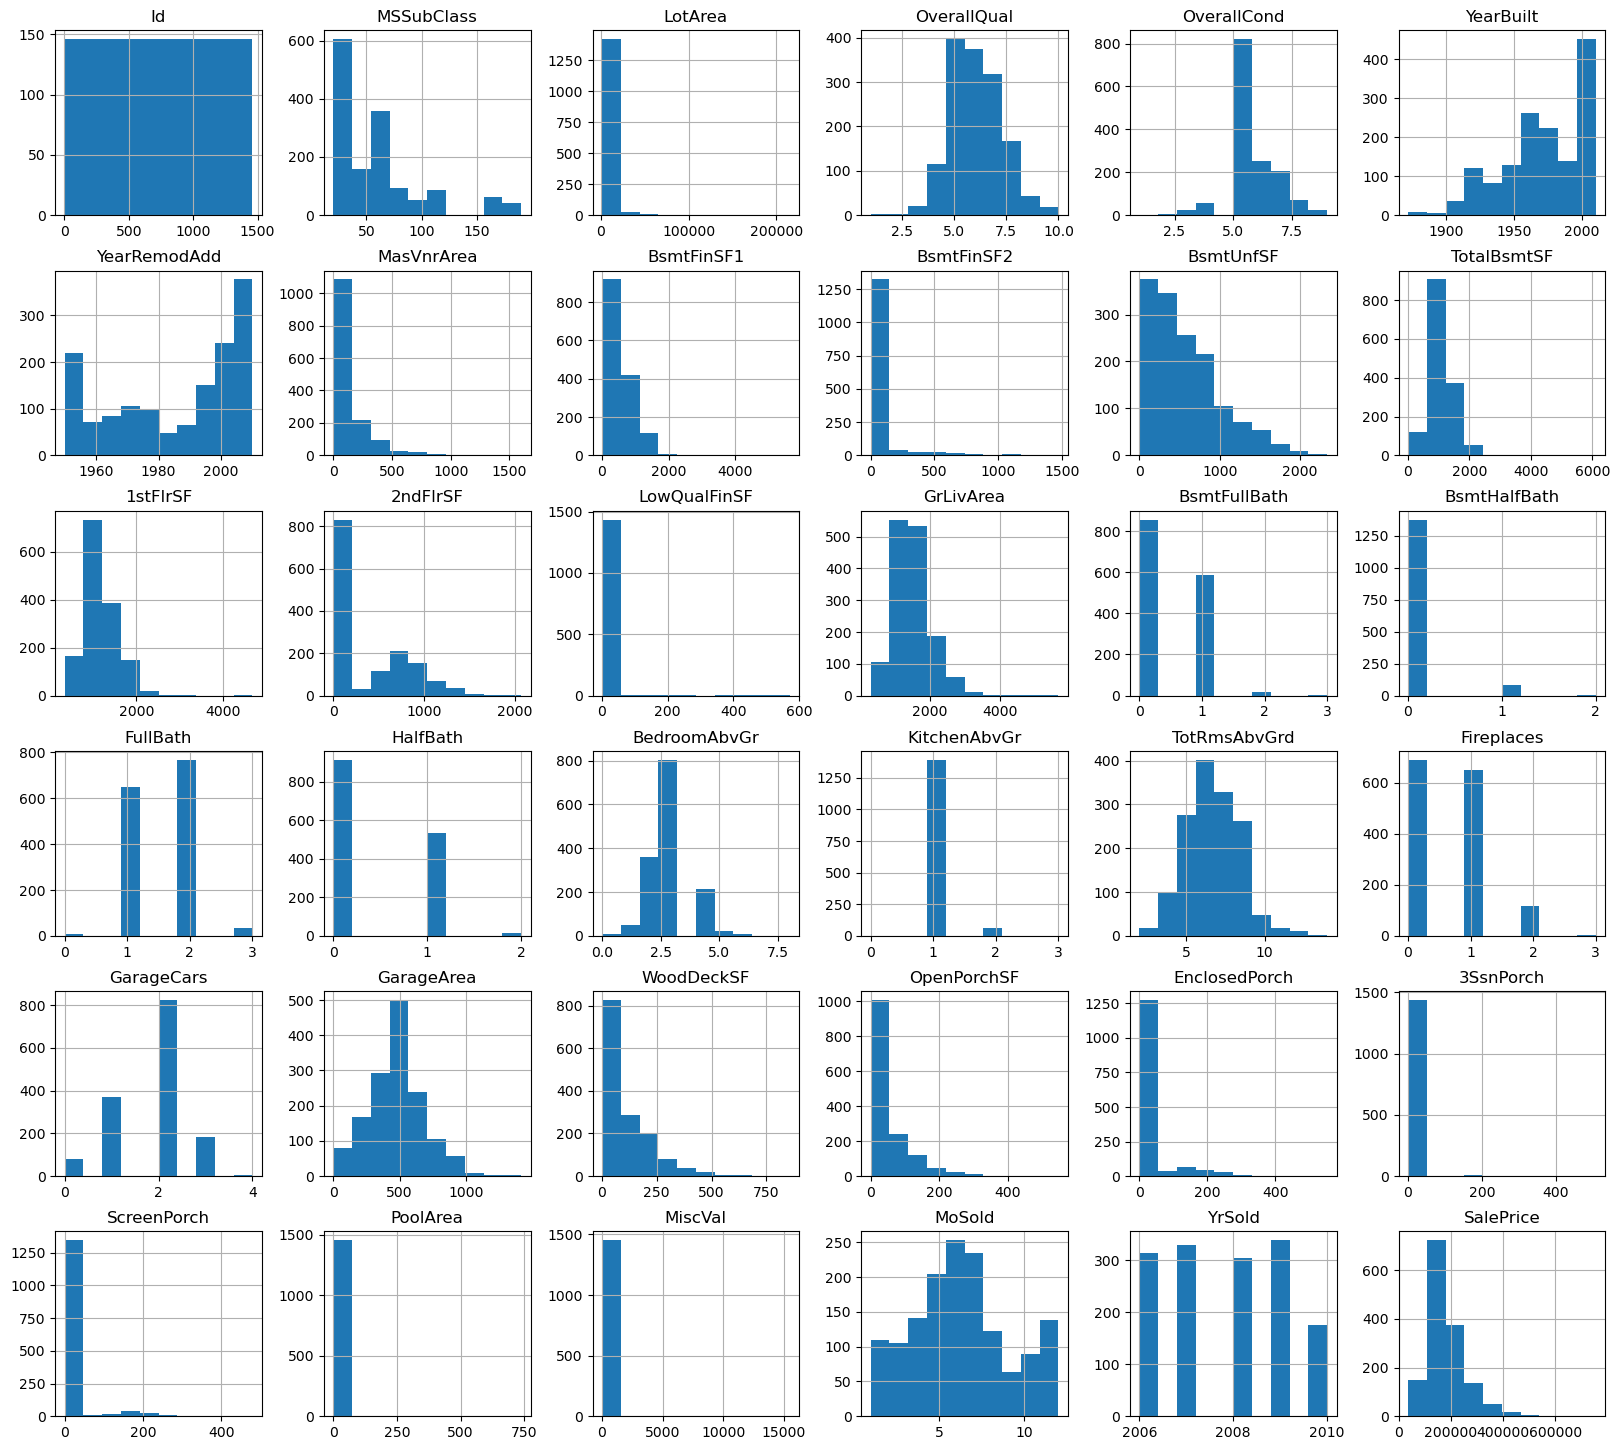

In [72]:
#Vemos los histogramas con valores NANs imputados
df_train.hist(figsize=(20,18)); # el ; sirve para quitar los AxesSubplot de la salida

### Analisis de la variable objetivo

In [73]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

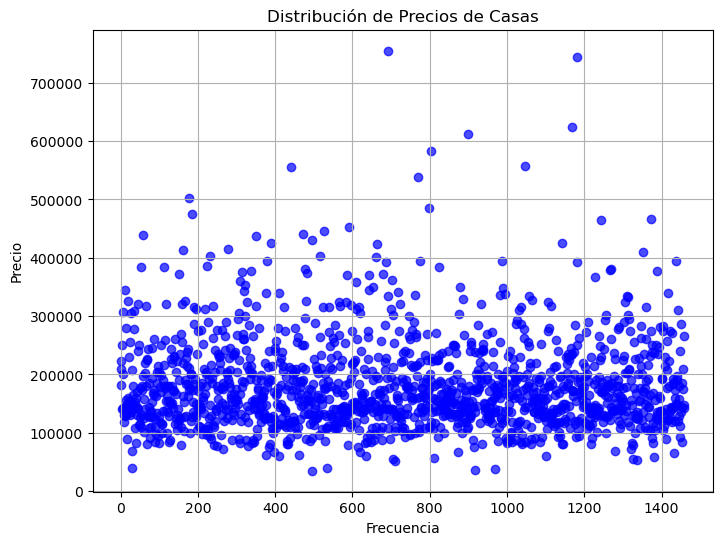

In [74]:
plt.figure(figsize=(8, 6));
plt.scatter(range(len(df_train)), df_train['SalePrice'],  color='blue', alpha=0.7);
plt.title('Distribución de Precios de Casas')
plt.xlabel('Frecuencia')
plt.ylabel('Precio')
plt.grid(True)
plt.show();


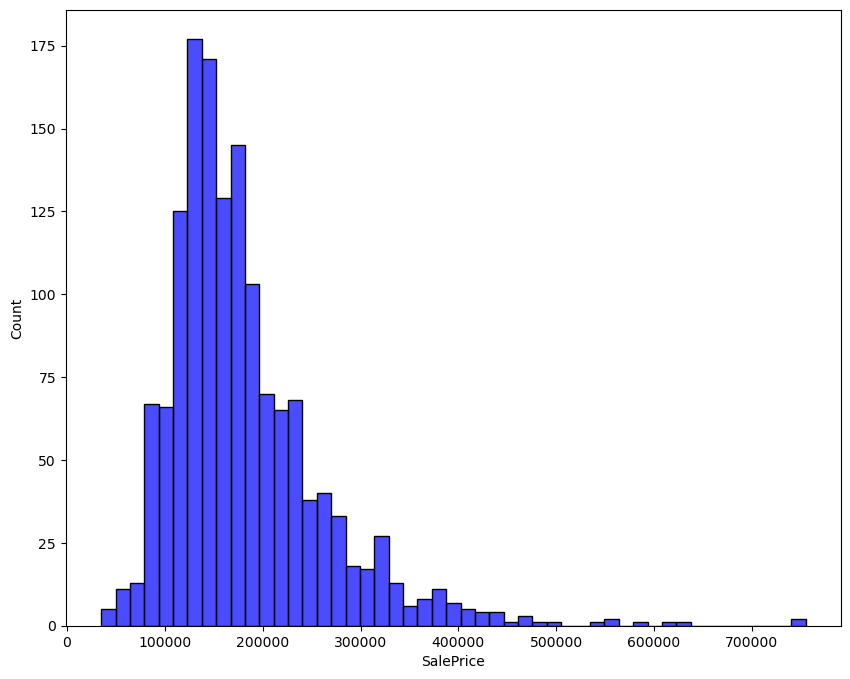

In [75]:
plt.figure(figsize=(10, 8))
sns.histplot(df_train['SalePrice'],  color='blue', alpha=0.7);

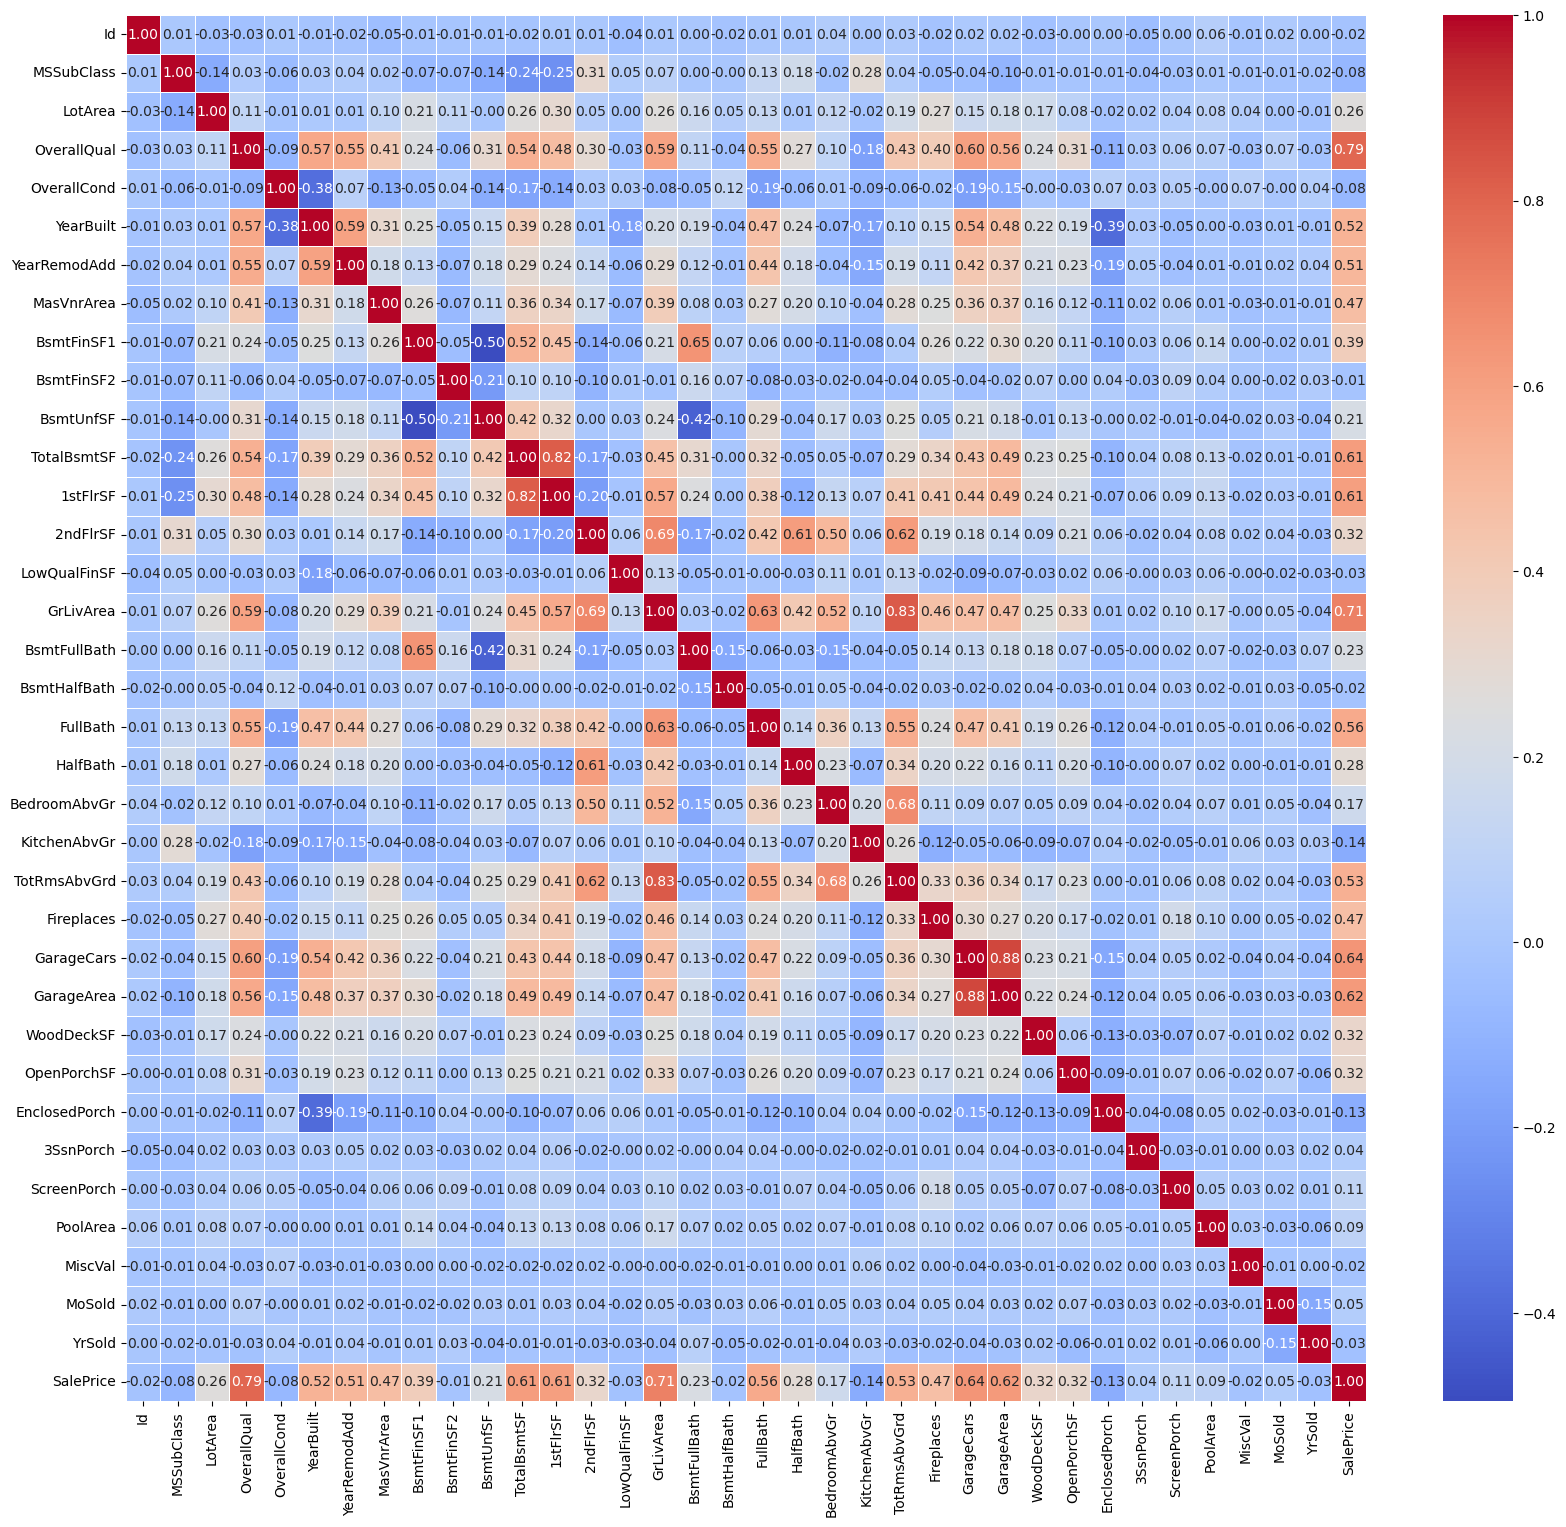

In [76]:
## sacamos las correlaciones de las variables
plt.figure(figsize=(20,18))
df_numeric = df_train.select_dtypes(include=['number'])
correlation_mat = df_numeric.corr()
#usamos la libreria heatmap, para sacar el mapa de calor
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

In [77]:
# Evidentemente la variable Id no tiene correlación con la variable target
# BsmtFinSF2, LowQualFinSF, BsmtHalfBath, MiscVal, YrSold no tienen apenas correlación con la variable target


### Variables Categóricas

In [78]:
variables_categoricas = df_train.select_dtypes(include='object')
variables_categoricas

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,1999.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1456,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,1978.0,Unf,TA,TA,Y,NA,MnPrv,NA,WD,Normal
1457,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,1941.0,RFn,TA,TA,Y,NA,GdPrv,Shed,WD,Normal
1458,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,1950.0,Unf,TA,TA,Y,NA,NA,NA,WD,Normal


In [79]:
nombres_columnas_categoricas = df_train.select_dtypes(include='object').columns.tolist()
nombres_columnas_categoricas

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [106]:
# Definimos una función que haga que las variables binarias tengan 0 o 1:
def binary(dataset, column):
    dataset = pd.get_dummies(dataset, columns=[column], drop_first=True, dtype=int)
    return dataset

# Después de aplicar One-Hot Encoding
df_train = binary(df_train, 'Street')
df_train = binary(df_train, 'CentralAir')

KeyError: "None of [Index(['Street'], dtype='object')] are in the [columns]"

In [ ]:
# Aplicar la función a las columnas correspondientes
df_train = binary(df_train, 'Street')
df_train = binary(df_train, 'CentralAir')

In [112]:
df_train

,Id,MSSubClass,MSZoning,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Pave,CentralAir_Y
0,1,60,RL,8450,NA,Reg,Lvl,AllPub,Inside,Gtl,...,NA,NA,0,2,2008,WD,Normal,208500,1,1
1,2,20,RL,9600,NA,Reg,Lvl,AllPub,FR2,Gtl,...,NA,NA,0,5,2007,WD,Normal,181500,1,1
2,3,60,RL,11250,NA,IR1,Lvl,AllPub,Inside,Gtl,...,NA,NA,0,9,2008,WD,Normal,223500,1,1
3,4,70,RL,9550,NA,IR1,Lvl,AllPub,Corner,Gtl,...,NA,NA,0,2,2006,WD,Abnorml,140000,1,1
4,5,60,RL,14260,NA,IR1,Lvl,AllPub,FR2,Gtl,...,NA,NA,0,12,2008,WD,Normal,250000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,NA,Reg,Lvl,AllPub,Inside,Gtl,...,NA,NA,0,8,2007,WD,Normal,175000,1,1
1456,1457,20,RL,13175,NA,Reg,Lvl,AllPub,Inside,Gtl,...,MnPrv,NA,0,2,2010,WD,Normal,210000,1,1
1457,1458,70,RL,9042,NA,Reg,Lvl,AllPub,Inside,Gtl,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500,1,1
1458,1459,20,RL,9717,NA,Reg,Lvl,AllPub,Inside,Gtl,...,NA,NA,0,4,2010,WD,Normal,142125,1,1
